In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<font size="+2" color="lightgreen">0.1 Imports</font>

In [14]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import math
import numpy as np
import collections
from numpy import linalg as la
import time
import json
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import smart_open
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from random import randint
import pickle

<font size="+5" color="seagreen">1. Text Processing</font>


<font size="+2" color="lightgreen">1.1 Read the data</font>

In [15]:
"""
This dataset consists only of one line where all the 2399 tweets by the WHO twitter account. 
We use the json python library to load this text as a dictionary since the dataset is stored 
in JSON format. 
"""
docs_path = 'dataset_tweets_WHO.txt'
with open(docs_path) as fp:
    lines = fp.readline()
tweets = json.loads(lines)

<font size="+0.5" color="greenyellow">Here we've placed a print in order to ckeck the structure the tweets follow </font>

In [16]:
print("First tweet structure:")
tweets['0']

First tweet structure:


{'created_at': 'Wed Oct 13 09:15:58 +0000 2021',
 'id': 1448215930178310144,
 'id_str': '1448215930178310144',
 'full_text': "It's International Day for Disaster Risk Reduction\n\n#OpenWHO has launched a multi-tiered core curriculum to help equip you with the competencies needed to work within public health emergency response.\n\nStart learning today &amp; be #Ready4Response:\n👉 https://t.co/hBFFOF0xKL https://t.co/fgZY22RWuS",
 'truncated': False,
 'display_text_range': [0, 274],
 'entities': {'hashtags': [{'text': 'OpenWHO', 'indices': [52, 60]},
   {'text': 'Ready4Response', 'indices': [232, 247]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/hBFFOF0xKL',
    'expanded_url': 'https://bit.ly/3wCa0Dr',
    'display_url': 'bit.ly/3wCa0Dr',
    'indices': [251, 274]}],
  'media': [{'id': 1448215398814560259,
    'id_str': '1448215398814560259',
    'indices': [275, 298],
    'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1448215398814560259/pu/img/0CO

<font size="+0.5" color="greenyellow">Here we've placed a print in order to ckeck the keys of a tweet</font>

In [17]:
tweets['0'].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

<font size="+0.5" color="greenyellow">In order to check that the results of our future trials, we print the text of the firsnt 3 tweets </font>

In [18]:
print("First three full text tweets:\n")
for i in range(3):
    print("Tweet number",i+1,":\n")
    print(tweets[str(i)]["full_text"])
    print("\n")
    

First three full text tweets:

Tweet number 1 :

It's International Day for Disaster Risk Reduction

#OpenWHO has launched a multi-tiered core curriculum to help equip you with the competencies needed to work within public health emergency response.

Start learning today &amp; be #Ready4Response:
👉 https://t.co/hBFFOF0xKL https://t.co/fgZY22RWuS


Tweet number 2 :

#COVID19 has shown how health emergencies and disasters affect entire communities – especially those with weak health systems, and vulnerable populations like migrants, indigenous peoples, and those living in fragile humanitarian conditions. https://t.co/jpUQpnu0V1


Tweet number 3 :

It's International Day for Disaster Risk Reduction
 
To better respond to emergencies countries must:
✅ invest in health care systems
✅ achieve gender equity
✅ protect marginalised groups
✅ ensure ready &amp; equitable access to supplies
 
A strong &amp; resilient health system is 🔑 https://t.co/5NALyjIymp




<font size="+2" color="lightgreen">1.2 Process tweets</font>

In [19]:
def process_tweet(line):
    """
    Pre-process the tweet text removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.
    
    Argument:
    line -- string (text) to be pre-processed
    
    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    line = line.lower() # Transform in lowercase
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    line = tokenizer.tokenize(line)
    line = [word for word in line if word not in stop_words]  #eliminate the stopwords 
    line = [stemmer.stem(word) for word in line] #perform stemming 
    i = 0
    for word in line:
        if word[0:4] == 'http':
            line = line[:i]
        i+=1
    ## END CODE
    return line

In [20]:
"""
Here for every tweet we extract the 'full_text' variable since we will only 
search inside the text of each tweet. Thus, we pre-process each tweet and 
store it in a new dictionary called proc_tweets for later use
"""
proc_tweets = {}
for tweet_id, tweet in zip(tweets.keys(),tweets.values()):
    proc_tweets[int(tweet_id)] = process_tweet(tweet['full_text'])

<font size="+0.5" color="greenyellow">Print of the processed tweets to check that our function works</font>

In [21]:
print("First five processed tweets\n")
for i in range(3):
    print(proc_tweets[i])
    print("\n")
    

First five processed tweets

['intern', 'day', 'disast', 'risk', 'reduct', 'openwho', 'launch', 'multi', 'tier', 'core', 'curriculum', 'help', 'equip', 'compet', 'need', 'work', 'within', 'public', 'health', 'emerg', 'respons', 'start', 'learn', 'today', 'amp', 'ready4respons']


['covid19', 'shown', 'health', 'emerg', 'disast', 'affect', 'entir', 'commun', 'especi', 'weak', 'health', 'system', 'vulner', 'popul', 'like', 'migrant', 'indigen', 'peopl', 'live', 'fragil', 'humanitarian', 'condit']


['intern', 'day', 'disast', 'risk', 'reduct', 'better', 'respond', 'emerg', 'countri', 'must', 'invest', 'health', 'care', 'system', 'achiev', 'gender', 'equiti', 'protect', 'marginalis', 'group', 'ensur', 'readi', 'amp', 'equit', 'access', 'suppli', 'strong', 'amp', 'resili', 'health', 'system']




<font size="+5" color="seagreen">2. Indexing</font>

In [26]:
def get_tweet_info(tweet, tweet_id):
    Tweet = tweet['full_text']
    Username = tweet['user']['name']
    Date = tweet['created_at']
    Hashtags = []
    hashtags_list = tweet['entities']['hashtags']
    for hashtag in hashtags_list:
        Hashtags.append(hashtag['text'])
    Likes = tweet['favorite_count']
    Retweets = tweet['retweet_count']
    Url = f"https://twitter.com/{tweet['user']['screen_name']}/status/{tweet['id_str']}"
    details = "doc_details?id={}&param1=1&param2=2".format(tweet_id)
    info = [Tweet, Username, Date, Hashtags, Likes, Retweets, Url, details]    
    return info



In [27]:
def create_index(tweets):
    """
    Generates the index from our database to perform queries from
    
    Argument:
    tweets -- collection of tweets
    
    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in as values.
    """
    index = {}
    id_index = {}
    tf = {}
    df = defaultdict(int)
    idf = defaultdict(float)
    numDocuments = len(tweets)
    for i in range(numDocuments):
        tweet = tweets[str(i)]
        terms = process_tweet(tweet['full_text']) #get tweet text
        id_tweet = tweet['id']
        info = get_tweet_info(tweet, id_tweet) # get "document" info
        id_index[id_tweet]=info
        
        for term in terms: 
            try:
                index[term].append(id_tweet)  
                
            except:
                index[term]= [id_tweet]
            
        norm=0
        for term,ids in index.items():
            norm += len(ids)**2
        norm = math.sqrt(norm)
        
        for term,ids in index.items():
            if term in tf:
                tf[term][id_tweet] = np.round(len(ids)/norm,4)
            else:
                tf[term] = {id_tweet:np.round(len(ids)/norm,4)}
            df[term] += 1
        
        for term in index:
            idf[term] = np.round(np.log(float(numDocuments/df[term])),4)
        
    return index, tf,df,idf,id_index

In [28]:
start_time = time.time()
index, tf,df,idf,id_index = create_index(tweets)
print("Total time to create the index: {} seconds".format(np.round(time.time() - start_time, 2)))

Total time to create the index: 231.17 seconds


In [29]:
with open('index.pkl', 'wb') as index_file:
    pickle.dump(index, index_file)
    
with open('tf.pkl', 'wb') as tf_file:
    pickle.dump(tf, tf_file)

with open('df.pkl', 'wb') as df_file:
    pickle.dump(df, df_file)

with open('idf.pkl', 'wb') as idf_file:
    pickle.dump(idf, idf_file)
    
with open('id_index.pkl', 'wb') as id_index_file:
    pickle.dump(id_index, id_index_file)


In [13]:
def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """


    doc_vectors = defaultdict(lambda: [0] * len(terms)) 
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms) 

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]=query_terms_count[term]/query_norm * idf[term] 

        # Generate doc_vectors for matching docs
        for doc in index[term]:          
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc] * idf[term]

    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        if not query:
            return None
        result_docs, doc_scores = search_tf_idf(query, index)
    return result_docs, doc_scores

In [14]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = process_tweet(query)
    docs = set()
    first = True
    if not query:
        return None
    for term in query:
        try:
            list_docs = index[term]
            if first:
                docs = set(list_docs)
                first = False
            else:
                docs &= set(list_docs)
        except:
            break
            
    docs = list(docs)
    ranked_docs, doc_scores = rank_documents(query, docs, index, idf, tf, id_index)
    
    return ranked_docs, doc_scores

In [15]:
print("Insert your query (i.e.: Computer Science):\n")
num_queries = 5
#queries = [None]*num_queries
retrieved_docs = {} #keys will be the query id
queries = [
    'Covid vaccine',
    'International health',
    'Covid pandemics',
    'Health risk',
    'World pandemic'
] #  Comment this line if you want to write your own queries

for q_id in range(num_queries):
    #query = input()
    query = queries[q_id] # Comment this line and uncomment the line above if you want to write your own queries
    ranked_docs, doc_scores = search_tf_idf(query, index)
    top = 20
    queries[q_id] = query
    if ranked_docs:
        print(f"\n======================\nTop {top} results out of {len(ranked_docs)} for the searched query ({query}):\n")
        retrieved_docs[q_id] = doc_scores[:top]
        for d_id in ranked_docs[:top]:
            print(f"{id_index[d_id]}\n")

Insert your query (i.e.: Computer Science):


Top 20 results out of 13 for the searched query (Covid vaccine):

["RT @WHOAFRO: Join tomorrow's media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries…", 'World Health Organization (WHO)', 'Wed Sep 29 19:01:27 +0000 2021', ['COVID19'], 0, 21, 'https://twitter.com/WHO/status/1443289841698025473']

['RT @WHOAFRO: 📺 LIVE: @WHOAFRO media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries…', 'World Health Organization (WHO)', 'Thu Sep 30 10:07:43 +0000 2021', ['COVID19'], 0, 27, 'https://twitter.com/WHO/status/1443517908072730624']

['Q&amp;A #AskWHO on COVID-19 vaccines effectiveness https://t.co/FEdfOREhjn', 'World Health Organization (WHO)', 'Wed Jun 30 16:12:43 +0000 2021', ['AskWHO'], 219, 85, 'https://twitter.com/WHO/status/1410270080873598979']

['The heads of the four organizations discussed the urgency of increasing suppl

<font size="+5" color="seagreen">3. Evaluation</font>

<font size="+2" color="lightgreen">3.1 Ground truth</font>

In [16]:
def median_amount(id_index):
    """
    Input: A dictionary of the retrieved docs of a query.
    Output: The median number of retweets and likes found in the dictionary
    """
    median_retweets = []
    median_likes = []
    for doc_id in id_index:
        doc = id_index[doc_id]
        median_retweets.append(doc[-2])
        median_likes.append(doc[-3])
    return np.percentile(median_retweets, 50),np.percentile(median_likes, 50)

In [17]:
def bin_y_true(doc_info,median_retweets,median_likes):
    """
    Input: A document info and the median number of retweets and likes found in a dictionary of all the tweets
    Output: 0 if the document is not relevant a 1 if the document is relevant, all of it based on the number of retweets and likes
    of the document
    """   
    num_retweets = doc_info[-2]
    num_likes = doc_info[-3]
    threshold = 0.1 
    if num_retweets >= median_likes or num_likes >= median_likes:
        return 1
    else:
        return 0


In [18]:
print("Evaluation:\n")
first = True
median_retweets,median_likes = median_amount(id_index)
#The line abive is to get the median number of retweets and the median number of likes af all the tweets respectively
for q_id in retrieved_docs.keys():
    docs_id = []
    y = []
    bin_y = []
    for doc in retrieved_docs[q_id]:
        if first:
            docs_id.append(doc[1])
            y.append(doc[0])
            bin_y.append(bin_y_true(id_index[doc[1]],median_retweets,median_likes))
        else:
            data = {'q_id':q_id,'doc_id':doc[1] , 'predicted_relevance':doc[0],'bin_y_true':bin_y_true(id_index[doc[1]],median_retweets,median_likes)}
            search_results = search_results.append(data,ignore_index=True)
    if first:
        data = {'q_id':q_id,'doc_id':docs_id , 'predicted_relevance':y,'bin_y_true':bin_y}
        search_results = pd.DataFrame(data)
        first = False
display(search_results.head())

Evaluation:



,q_id,doc_id,predicted_relevance,bin_y_true
0,0.0,1.443290e+18,3.645828e-07,0.0
1,0.0,1.443518e+18,3.568089e-07,0.0
2,0.0,1.410270e+18,2.900135e-07,1.0
3,0.0,1.410328e+18,2.882401e-07,0.0
4,0.0,1.418205e+18,2.836071e-07,1.0


<font size="+2" color="lightgreen">3.2 Evaluation techniques </font>

<font size="+1" color="greenyellow">3.2.1 Precision@K (P@K) </font>

In [19]:
def precision_at_k(y_true, y_score, k=10):
    '''    
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.
    
    Returns
    -------
    precision @k : float
    
    '''    
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order)[:k]
    relevant = np.sum(y_true)
    
    return relevant/k

<font size="+1" color="greenyellow">3.2.2 Average Precision@K (P@K) </font>

In [20]:
def avg_precision_at_k(y_true, y_score, k=10):
    
    '''
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.
    
    Returns
    -------
    average precision @k : float
    '''
    
    gtp = np.sum(y_true == 1)
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])           

    ## if all docs are not relevant
    if gtp==0:
        return 0
    n_relevant_at_i = 0
    prec_at_i = 0
    for i in range(len(y_true)):
        if y_true[i] == 1:
            n_relevant_at_i += 1
            prec_at_i += n_relevant_at_i/(i + 1)
            
    return prec_at_i/gtp

<font size="+1" color="greenyellow">3.2.3 Mean Average Precision (MAP) </font>

In [21]:
def map_at_k(search_res, k=10):
    '''
    Parameters
    ----------
    search_res: search results dataset containing:
        q_id: query id.
        doc_id: document id.
        predicted_relevance: relevance predicted through LightGBM.
        y_true: actual score of the document for the query (ground truth).
    
    Returns
    -------
    mean average precision @k : float
    '''
    avp = []
    for q in search_res['q_id'].unique(): #loop over all query id
        curr_data = search_res[search_res['q_id'] == q]  # select data for current query
        avp.append(avg_precision_at_k(np.array(curr_data['bin_y_true']), np.array(curr_data['predicted_relevance']), k)) #append average precision for current query
    return np.sum(avp)/len(avp) # return mean average precision

<font size="+1" color="greenyellow">3.2.4 Mean Reciprocal Rank (MRR) </font>

In [22]:
def rr_at_k(y_true, y_score, k=10):
    '''
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    y_score: Predicted scores.
    k : number of doc to consider.
    
    Returns
    -------
    Reciprocal Rank for qurrent query
    '''

    order = np.argsort(y_score)[::-1] # get the list of indexes of the predicted score sorted in descending order.
    y_true = np.take(y_true, order[:k]) # sort the actual relevance label of the documents based on predicted score and take first k.

    if np.sum(y_true) == 0: # if there are not relevant doument return 0
        return 0
    return 1/(np.argmax(y_true == 1) + 1) 

<font size="+1" color="greenyellow">3.2.5 Normalized Discounted Cumulative Gain (NDGC) </font>

In [23]:
def dcg_at_k(y_true, y_score,  k=10):
    order = np.argsort(y_score)[::-1] # get the list of indexes of the predicted score sorted in descending order.
    y_true = np.take(y_true, order[:k]) # sort the actual relevance label of the documents based on predicted score and take first k.
    gain = (2**y_true) - 1 # Compute gain 
    discounts = np.log2(np.arange(len(y_true)) + 2) # Compute denominator
    return np.sum(gain / discounts) #return dcg@k


def ndcg_at_k(y_true, y_score, k=10):    
    dcg_max = dcg_at_k(y_true, y_true, k) # Ideal dcg
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(y_true, y_score, k)/dcg_max,4)  # return ndcg@k

In [24]:
"""Generate results of different evaluation methods"""

current_query = 0
current_query_res = search_results[search_results["q_id"] == current_query] 
k = 10
print("Evaluation about query 0:",queries[current_query],"\n")

print("==> Precision@{}: {}\n".format(k, precision_at_k(current_query_res["bin_y_true"],
                                                        current_query_res["predicted_relevance"],
                                                        k)))

print("==> AveragePrecision@{}: {}\n".format(k,avg_precision_at_k(np.array(current_query_res["bin_y_true"]),
                                                                  np.array(current_query_res["predicted_relevance"]), 
                                                                  150)))

print("==> MeanAveragePrecision@{}: {}\n".format(k, map_at_k(search_results,10)))

"""Generate Reciprocal Rank

For the top 3, 5 and 10 queries scores. 

First for every query we: Get its labels,the predicted score, calculate its RR score and append at to all our
previous scores.

"""


mrr = {}
for k in [3,5,10]:
    RRs = []
    for q in search_results['q_id'].unique(): 
        labels = np.array(search_results[search_results['q_id'] == q] ['bin_y_true']) 
        scores = np.array(search_results[search_results['q_id'] == q] ['predicted_relevance'])
        RRs.append(rr_at_k(labels, scores, k)) 
    mrr[k] = np.round(float(sum(RRs)/len(RRs)) ,4)

print("==> MeanReciprocalRank: {}\n".format(mrr[k]))

labels = np.array(search_results[search_results['q_id'] == q_id]["bin_y_true"])
scores = np.array(search_results[search_results['q_id'] == q_id]["predicted_relevance"])
ndcg_k = np.round(ndcg_at_k(labels, scores, k),4)

print("==> NormalizedDiscountedCumulativeGain@{} for query with q_id={}: {}\n".format(k,current_query,ndcg_k))


ndcgs = []
k=10
for q in search_results['q_id'].unique(): # loop over all query ids
    labels = np.array(search_results[search_results['q_id'] == q]['bin_y_true']) ## get labels for current query
    scores = np.array(search_results[search_results['q_id'] == q]['predicted_relevance']) # get predicted score for current query
    ndcgs.append(np.round(ndcg_at_k(labels, scores, k), 4)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)),4) # Compute average NDCG
print("==> Average ndcg@{} (considering all queries): {}".format(k,avg_ndcg))



Evaluation about query 0: Covid vaccine 

==> Precision@10: 0.7

==> AveragePrecision@10: 0.5859668109668109

==> MeanAveragePrecision@10: 0.6051939563704269

==> MeanReciprocalRank: 0.7667

==> NormalizedDiscountedCumulativeGain@10 for query with q_id=0: 0.6159

==> Average ndcg@10 (considering all queries): 0.795


<font size="+2" color="lightgreen">3.3 Word 2 Vec</font>

In [25]:
words = [[word for word in index.keys()]]  # Generate vocabulary to be used in TSNE

word2vec = Word2Vec(words, min_count=1)

In [26]:
"""Generate word embeddings"""

keys = ['covid','vaccine','economic', 'cure']
keys = [process_tweet(word) for word in keys]
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec.wv.most_similar(word, topn=50):
        words.append(similar_word)
        embeddings.append(word2vec.wv[similar_word])
        
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [27]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=1000, random_state=32,verbose=1)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


C:\Users\David\anaconda3\envs\IRWA\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\David\anaconda3\envs\IRWA\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.016156
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.359482
[t-SNE] KL divergence after 1000 iterations: 1.466762


In [28]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

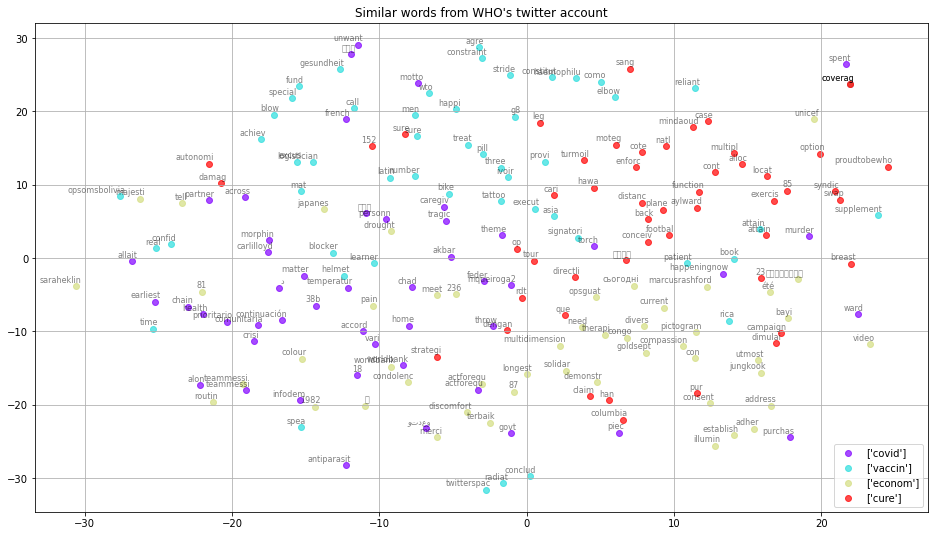

In [29]:
tsne_plot_similar_words("Similar words from WHO's twitter account", 
                        keys, 
                        embeddings_en_2d, 
                        word_clusters, 
                        0.7,
                        filename='similar_words.png')

<font size="+0.5" color="indianred">1. Ground truth is a bit poor, 2. Not outstanding results, 3. Use conjunctive queries</font>

<font size="+5" color="seagreen">4. Ranking</font>

In [30]:
def rank_documents_own(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """


    doc_vectors = defaultdict(lambda: [0] * len(terms)) 
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms) 

    query_norm = la.norm(list(query_terms_count.values()))
    
    # retrieve maximal and minimal number of likes and rts so we can normalize 
    # the values to generate scores using a min-max normalization
    
    likes = []
    rts = []
    for _,docs_ in index.items():
        for doc in docs_:
            tweet = id_index[doc]
            likes_n = tweet[4]
            rts_n = tweet[5]

            if likes_n not in likes:
                likes.append(likes_n)

            if rts_n not in rts:
                rts.append(rts_n)
                
    max_likes = np.max(likes)
    max_rts = np.max(rts)
    min_likes = np.min(likes)
    min_rts = np.min(rts)
    
    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]=(1+np.log2(query_terms_count[term]/query_norm)) * np.log2(idf[term]) 

        # Generate doc_vectors for matching docs
        for doc in index[term]:          
            if doc in docs:
                tweet = id_index[doc]
                likes_doc = tweet[4]
                rts_doc = tweet[5]
                
                likes_score = (likes_doc - min_likes)/(max_likes - min_likes)
                rts_score = (rts_doc - min_rts)/(max_rts - min_rts)
                doc_vectors[doc][termIndex] = ((1+np.log2(tf[term][doc])) * np.log2(idf[term]) 
                                               + likes_score 
                                               + rts_score)
    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    
    result_docs = [x[1] for x in doc_scores]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        if not query:
            return None
        result_docs, doc_scores = search_tf_idf_own(query, index)
    return result_docs, doc_scores

In [31]:
def search_tf_idf_own(query, index):
    """
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = process_tweet(query)
    docs = set()
    first = True
    if not query:
        return None
    for term in query:
        try:
            list_docs = index[term]
            if first:
                docs = set(list_docs)
                first = False
            else:
                docs &= set(list_docs)
        except:
            break
            
    docs = list(docs)
    ranked_docs, doc_scores = rank_documents_own(query, docs, index, idf, tf, id_index)
    
    return ranked_docs, doc_scores

In [32]:
print("Insert your query (i.e.: Computer Science):\n")
num_queries = 5
#queries = [None]*num_queries
retrieved_docs = {} #keys will be the query id
queries = [
    'Covid vaccine',
    'International health',
    'Covid pandemics',
    'Health risk',
    'World pandemic'
] #  Comment this line if you want to write your own queries

for q_id in range(num_queries):
    #query = input()
    query = queries[q_id] # Comment this line and uncomment the line above if you want to write your own queries
    ranked_docs, doc_scores = search_tf_idf_own(query, index)
    top = 20
    queries[q_id] = query
    if ranked_docs:
        print(f"\n======================\nTop {top} results out of {len(ranked_docs)} for the searched query ({query}):\n")
        retrieved_docs[q_id] = doc_scores[:top]
        for d_id in ranked_docs[:top]:
            print(f"{id_index[d_id]}\n")

Insert your query (i.e.: Computer Science):


Top 20 results out of 13 for the searched query (Covid vaccine):

["RT @WHOAFRO: Join tomorrow's media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries…", 'World Health Organization (WHO)', 'Wed Sep 29 19:01:27 +0000 2021', ['COVID19'], 0, 21, 'https://twitter.com/WHO/status/1443289841698025473']

['RT @WHOAFRO: 📺 LIVE: @WHOAFRO media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries…', 'World Health Organization (WHO)', 'Thu Sep 30 10:07:43 +0000 2021', ['COVID19'], 0, 27, 'https://twitter.com/WHO/status/1443517908072730624']

['Are you involved in the costing, budgeting or financing processes of #COVID19 vaccine delivery in your country?\n\nJoin our 🆕 #OpenWHO course to learn how to use the COVID-19 Vaccine Introduction and deployment Costing Tool.\n\n👉 https://t.co/vyXfuxXSDB https://t.co/XPr1caIFg6', 'World Health Organiz

C:\Users\David\AppData\Local\Temp/ipykernel_15432/4057515869.py:53: RuntimeWarning: divide by zero encountered in log2
  query_vector[termIndex]=(1+np.log2(query_terms_count[term]/query_norm)) * np.log2(idf[term])
C:\Users\David\AppData\Local\Temp/ipykernel_15432/4057515869.py:64: RuntimeWarning: divide by zero encountered in log2
  doc_vectors[doc][termIndex] = ((1+np.log2(tf[term][doc])) * np.log2(idf[term])



Top 20 results out of 27 for the searched query (International health):

["It's International Day for Disaster Risk Reduction\n\n#OpenWHO has launched a multi-tiered core curriculum to help equip you with the competencies needed to work within public health emergency response.\n\nStart learning today &amp; be #Ready4Response:\n👉 https://t.co/hBFFOF0xKL https://t.co/fgZY22RWuS", 'World Health Organization (WHO)', 'Wed Oct 13 09:15:58 +0000 2021', ['OpenWHO', 'Ready4Response'], 52, 16, 'https://twitter.com/WHO/status/1448215930178310144']

["It's International Day for Disaster Risk Reduction\n \nTo better respond to emergencies countries must:\n✅ invest in health care systems\n✅ achieve gender equity\n✅ protect marginalised groups\n✅ ensure ready &amp; equitable access to supplies\n \nA strong &amp; resilient health system is 🔑 https://t.co/5NALyjIymp", 'World Health Organization (WHO)', 'Wed Oct 13 07:53:28 +0000 2021', [], 300, 109, 'https://twitter.com/WHO/status/1448195167048118274'


Top 20 results out of 10 for the searched query (Covid pandemics):

["RT @WHOAFRO: Join tomorrow's media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries…", 'World Health Organization (WHO)', 'Wed Sep 29 19:01:27 +0000 2021', ['COVID19'], 0, 21, 'https://twitter.com/WHO/status/1443289841698025473']

['@DrTedros "Although #VaccinEquity will help to end the pandemic, its effects will continue to be felt for many years – especially for the people who have been infected and will continue to suffer from the effects of post #COVID19 condition, also known as “long COVID”"-@DrTedros', 'World Health Organization (WHO)', 'Thu Oct 07 14:03:18 +0000 2021', ['VaccinEquity', 'COVID19'], 146, 37, 'https://twitter.com/WHO/status/1446113909480382464']

['RT @WHOAFRO: 📺 LIVE: @WHOAFRO media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries…', 'World Health Organization (WHO)', 'Thu Sep 3


Top 20 results out of 29 for the searched query (World pandemic):

['"The world is at a perilous point in this pandemic. \n\nWe have just passed the tragic milestone of 4 million recorded #COVID19 deaths, which likely underestimates the overall toll"-@DrTedros', 'World Health Organization (WHO)', 'Wed Jul 07 13:18:53 +0000 2021', ['COVID19'], 85, 52, 'https://twitter.com/WHO/status/1412763048071344128']

['@DrTedros "From a moral, epidemiological or economic point view, now is the time for the world to come together to tackle this pandemic collectively"-@DrTedros #COVID19 #VaccinEquity \nhttps://t.co/ip4HvF2SRR', 'World Health Organization (WHO)', 'Wed Jul 07 13:22:22 +0000 2021', ['COVID19', 'VaccinEquity'], 91, 50, 'https://twitter.com/WHO/status/1412763926039830534']

['RT @DrTedros: The world is at a perilous point in the #COVID19 pandemic. We have just passed the tragic milestone of 4 million recorded dea…', 'World Health Organization (WHO)', 'Wed Jul 07 20:47:34 +0000 2021', ['C

## Word2Vec cosine similarity

In [33]:
def rank_documents_w2v(terms, docs, index, idf, tf, title_index, word2vec):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """


    doc_vectors = defaultdict(lambda: [0] * len(terms)) 
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms) 

    query_norm = la.norm(list(query_terms_count.values()))
    
    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]=(1+np.log2(query_terms_count[term]/query_norm)) * np.log2(idf[term]) 

        # Generate doc_vectors for matching docs
        for doc in index[term]:          
            if doc in docs:
                tweet = id_index[doc]
                text = process_tweet(tweet[0])

                cosine_sims = []
                
                for word in text:
                        cosine_sims.append(word2vec.wv.similarity(word, term))
                
                cosine_sim = np.average(cosine_sims)
                
                doc_vectors[doc][termIndex] = cosine_sim

    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    
    result_docs = [x[1] for x in doc_scores]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        if not query:
            return None
        result_docs, doc_scores = search_tf_idf_w2v(query, index)
    return result_docs, doc_scores

In [34]:
def search_tf_idf_w2v(query, index, word2vec):
    """
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = process_tweet(query)
    docs = set()
    first = True
    if not query:
        return None
    for term in query:
        try:
            list_docs = index[term]
            if first:
                docs = set(list_docs)
                first = False
            else:
                docs &= set(list_docs)
        except:
            break
            
    docs = list(docs)
    ranked_docs, doc_scores = rank_documents_w2v(query, docs, index, idf, tf, id_index, word2vec)
    
    return ranked_docs, doc_scores

In [35]:
print("Insert your query (i.e.: Computer Science):\n")
num_queries = 5
#queries = [None]*num_queries
retrieved_docs = {} #keys will be the query id
queries = [
    'Covid vaccine',
    'International health',
    'Covid pandemics',
    'Health risk',
    'World pandemic'
] #  Comment this line if you want to write your own queries

for q_id in range(num_queries):
    #query = input()
    query = queries[q_id] # Comment this line and uncomment the line above if you want to write your own queries
    ranked_docs, doc_scores = search_tf_idf_w2v(query, index, word2vec)
    top = 20
    queries[q_id] = query
    if ranked_docs:
        print(f"\n======================\nTop {top} results out of {len(ranked_docs)} for the searched query ({query}):\n")
        retrieved_docs[q_id] = doc_scores[:top]
        for d_id in ranked_docs[:top]:
            print(f"{id_index[d_id]}\n")

Insert your query (i.e.: Computer Science):


Top 20 results out of 13 for the searched query (Covid vaccine):

['RT @WHOAFRO: 📺 LIVE: @WHOAFRO media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries…', 'World Health Organization (WHO)', 'Thu Sep 30 10:07:43 +0000 2021', ['COVID19'], 0, 27, 'https://twitter.com/WHO/status/1443517908072730624']

["RT @WHOAFRO: Join tomorrow's media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries…", 'World Health Organization (WHO)', 'Wed Sep 29 19:01:27 +0000 2021', ['COVID19'], 0, 21, 'https://twitter.com/WHO/status/1443289841698025473']

['▶️ If you have #COVID19, is it safe to breastfeed your baby❓\n\n▶️ Is it safe to get vaccinated against COVID-19 if you are breastfeeding❓\n\n▶️ How can you keep your baby safe while breastfeeding 🤱 if you have COVID-19❓\n\nDr Laurence Grummer-Strawn explains in #ScienceIn5. https://t.co/QMAq9TMY7A',

C:\Users\David\AppData\Local\Temp/ipykernel_15432/190631305.py:31: RuntimeWarning: divide by zero encountered in log2
  query_vector[termIndex]=(1+np.log2(query_terms_count[term]/query_norm)) * np.log2(idf[term])



Top 20 results out of 10 for the searched query (Covid pandemics):

['@DrTedros "Although #VaccinEquity will help to end the pandemic, its effects will continue to be felt for many years – especially for the people who have been infected and will continue to suffer from the effects of post #COVID19 condition, also known as “long COVID”"-@DrTedros', 'World Health Organization (WHO)', 'Thu Oct 07 14:03:18 +0000 2021', ['VaccinEquity', 'COVID19'], 146, 37, 'https://twitter.com/WHO/status/1446113909480382464']

['📙 The new book aims to help children stay positive during the #COVID19 pandemic.\nThe story is a sequel to the very well-received ‘My Hero is You: how kids can fight COVID-19!’, released in April 2020. https://t.co/JiURHza3ff https://t.co/GigV0LGWWH https://t.co/yiPs9W1CBn', 'World Health Organization (WHO)', 'Sat Sep 25 12:07:17 +0000 2021', ['COVID19'], 223, 74, 'https://twitter.com/WHO/status/1441736058421477381']

['WHO continues to fight the #COVID19 pandemic, supporting and